In [61]:
import numpy as np
import ndjson
import json
import os

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
numpy_path = 'data/numpy/'
datapath = 'data/images_{0}.npy'
sequencepath = 'data/sequences_{0}.npy'
labelpath = 'data/labels_{0}.json'
testsize = 10000
valsize = 5000

#first: stroke
#second: x/y
#third: point

# [1~254], 255: new stroke, 0: the end/default
# maximum length: 300
MAX_LENGTH = 200
simplify_path = 'data/simplify/'

In [3]:
def file_name(file_dir): 
    names = []
    for root, dirs, files in os.walk(file_dir):
        names.append(files) 
    names = [file.split('.')[0] for file in names[0]]
    return names

In [4]:
names = file_name(numpy_path)[:100]
name_dict = {}
for i in range(len(names)):
    name_dict[i] = names[i]

# Histogram For Stroke

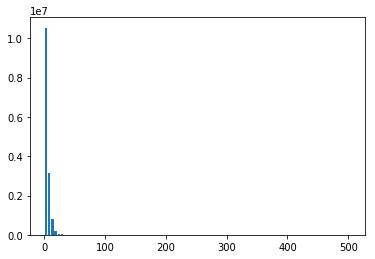

In [9]:
stroke_all = []

for k in range(len(names)):
    op = open(simplify_path+names[k]+'.ndjson')
    data = ndjson.load(op)
    
    for i in range(len(data)):
        instance = data[i]['drawing']
        stroke_all.append(len(instance))


hist, bins = np.histogram(stroke_all, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

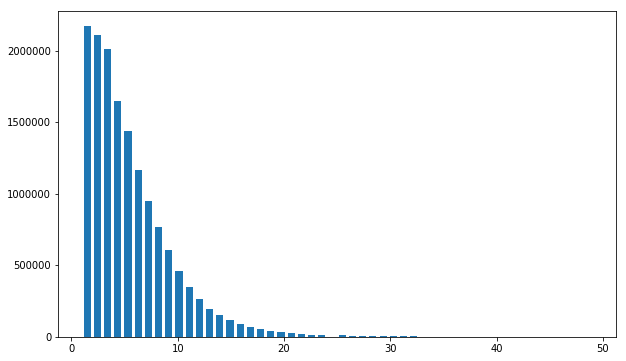

In [68]:
stroke_np = np.array(stroke_all)
np.save('./stroke_all.npy', stroke_np)
mask = stroke_np < 50
select_stroke = stroke_np[mask].tolist()

hist, bins = np.histogram(select_stroke, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure(figsize=(10, 6))
plt.bar(center, hist, align='center', width=width)
plt.show()

# Histogram For Point

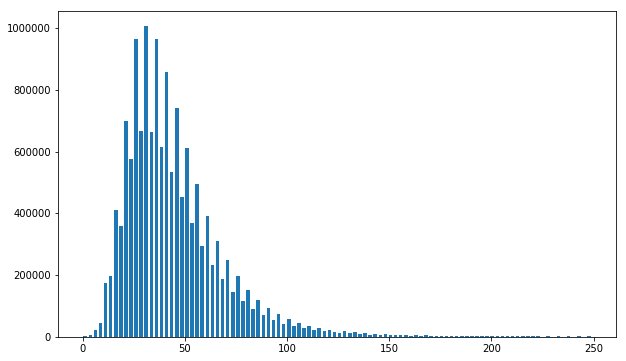

In [67]:
point_all = np.array([0])

for k in range(len(names)):
    data = np.load(simplify_path+names[k]+'_length.npy')
    point_all = np.concatenate((point_all, data), axis=0)

mask = point_all < 250

point_all = point_all[mask].tolist()
hist, bins = np.histogram(point_all, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure(figsize=(10, 6))
plt.bar(center, hist, align='center', width=width)
plt.show()

# Average Point For 100 Class

[36, 28, 47, 64, 38, 79, 32, 27, 67, 57, 25, 41, 26, 38, 47, 47, 26, 45, 44, 26, 36, 44, 45, 43, 25, 55, 100, 34, 48, 40, 56, 53, 49, 41, 66, 43, 36, 53, 49, 28, 51, 55, 71, 39, 38, 55, 64, 26, 41, 26, 41, 43, 70, 36, 52, 37, 44, 27, 45, 37, 25, 40, 39, 64, 32, 71, 44, 40, 89, 56, 86, 37, 31, 25, 41, 38, 41, 26, 27, 38, 73, 15, 25, 43, 24, 55, 66, 34, 53, 50, 41, 40, 38, 77, 59, 40, 32, 33, 34, 52]


<BarContainer object of 100 artists>

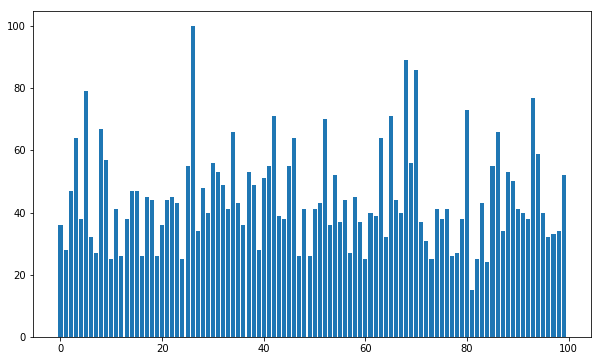

In [63]:
point_all = []

for k in range(len(names)):
    data = np.load(simplify_path+names[k]+'_length.npy')
    point_all.append(int(data.mean()))

print(point_all)
center = list(range(100))
figure(figsize=(10, 6))
plt.bar(center, point_all)

# Average Stroke For 100 Class

In [70]:


for k in range(len(names)):
    op = open(simplify_path+names[k]+'.ndjson')
    data = ndjson.load(op)
    print(names[k])
    stroke_num = []
    for i in range(len(data)):
        instance = data[i]['drawing']
        stroke_num.append(len(instance))
    stroke_np = np.array(stroke_num)
    np.save(simplify_path+names[k]+'_stroke.npy', stroke_np)

squiggle
bread
violin
bush
eyeglasses
soccer ball
string bean
shovel
zebra
kangaroo
spoon
submarine
underwear
hot air balloon
pickup truck
snowman
chair
cloud
giraffe
axe
matches
aircraft carrier
camel
saxophone
streetlight
drums
camouflage
grass
snorkel
laptop
hot tub
car
passport
flying saucer
lobster
cactus
apple
helicopter
compass
pear
cannon
spider
fan
bandage
cruise ship
blueberry
crab
elbow
cooler
circle
sleeping bag
yoga
owl
cup
backpack
castle
couch
sword
bottlecap
flashlight
suitcase
key
jacket
The Mona Lisa
tooth
goatee
headphones
The Great Wall of China
grapes
binoculars
beard
mouth
anvil
pillow
garden hose
light bulb
hot dog
pants
shorts
picture frame
pig
triangle
fork
remote control
finger
onion
mermaid
moustache
calculator
basketball
flamingo
trumpet
saw
tiger
alarm clock
clock
foot
snowflake
hammer
cello


In [72]:
strokes = []
for k in range(len(names)):
    op = np.load(simplify_path+names[k]+'_stroke.npy')
    strokes.append(int(op.mean()))

<BarContainer object of 100 artists>

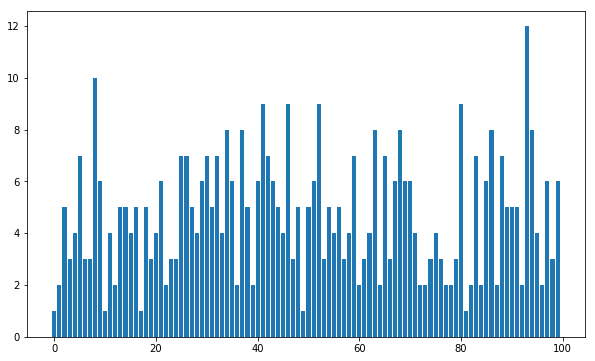

In [73]:
center = list(range(100))
figure(figsize=(10, 6))
plt.bar(center, strokes)